# Pipeline Project

You will be using the provided data to create a machine learning model pipeline.

You must handle the data appropriately in your pipeline to predict whether an
item is recommended by a customer based on their review.
Note the data includes numerical, categorical, and text data.

You should ensure you properly train and evaluate your model.

## The Data

The dataset has been anonymized and cleaned of missing values.

There are 8 features for to use to predict whether a customer recommends or does
not recommend a product.
The `Recommended IND` column gives whether a customer recommends the product
where `1` is recommended and a `0` is not recommended.
This is your model's target/

The features can be summarized as the following:

- **Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed.
- **Age**: Positive Integer variable of the reviewers age.
- **Title**: String variable for the title of the review.
- **Review Text**: String variable for the review body.
- **Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.
- **Division Name**: Categorical name of the product high level division.
- **Department Name**: Categorical name of the product department name.
- **Class Name**: Categorical name of the product class name.

The target:
- **Recommended IND**: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

## Load Data

In [1]:
import pandas as pd

# Load data
df = pd.read_csv(
    'data/reviews.csv',
)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18442 entries, 0 to 18441
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              18442 non-null  int64 
 1   Age                      18442 non-null  int64 
 2   Title                    18442 non-null  object
 3   Review Text              18442 non-null  object
 4   Positive Feedback Count  18442 non-null  int64 
 5   Division Name            18442 non-null  object
 6   Department Name          18442 non-null  object
 7   Class Name               18442 non-null  object
 8   Recommended IND          18442 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.3+ MB


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name,Recommended IND
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses,0
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants,1
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses,1
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses,0
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits,1


## Preparing features (`X`) & target (`y`)

In [2]:
data = df

# separate features from labels
X = data.drop('Recommended IND', axis=1)
y = data['Recommended IND'].copy()

print('Labels:', y.unique())
print('Features:')
display(X.head())

Labels: [0 1]
Features:


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits


In [3]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1,
    shuffle=True,
    random_state=27,
)

# Your Work

## Data Exploration

I want to first analyse the columns each and sort them into numerical, categorical and text variables. 

### Clothing ID

[   2    4    5    7    9   11   12   13   16   17   18   19   20   21
   22   25   26   29   30   45   52   55   62   63   65   70   75  112
  127  128  131  132  133  134  135  146  167  177  190  191  194  249
  256  262  271  279  282  294  298  299  306  316  323  324  326  332
  333  335  340  341  350  356  357  364  374  383  405  409  417  419
  429  433  435  437  446  447  448  449  450  451  453  456  460  472
  473  478  479  480  481  485  489  490  494  495  498  510  528  529
  530  533  537  539  540  541  542  546  550  551  552  555  559  560
  562  563  564  567  568  569  570  571  572  573  575  576  577  579
  582  586  587  588  589  590  592  593  596  597  602  603  604  605
  606  607  611  612  614  615  619  620  621  626  629  630  631  634
  635  636  640  641  643  647  649  661  667  669  673  674  676  693
  703  705  717  721  733  734  749  762  806  815  816  817  818  819
  820  821  822  823  824  825  826  827  828  829  830  831  832  833
  834 

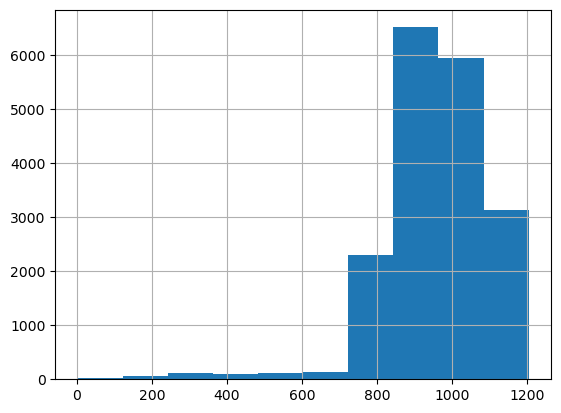

In [4]:
X['Clothing ID'].hist()
CID = X['Clothing ID'].unique()
CID.sort()
print(CID)
print(len(CID))

### Age

[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 89 90
 91 92 93 94 99]


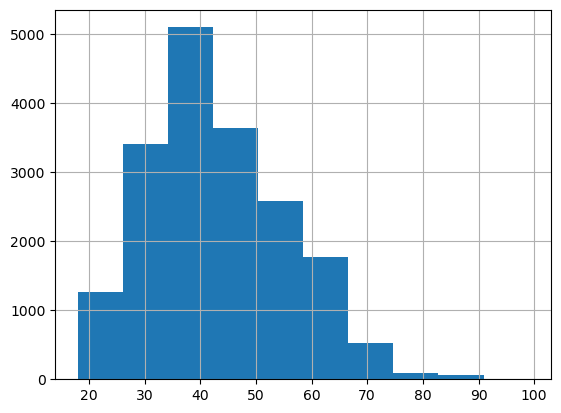

In [5]:
X['Age'].hist()
Age_unique = X['Age'].unique()
Age_unique.sort()
print(Age_unique)

### Title

Title
Love it!                            129
Beautiful                            88
Love                                 81
Love!                                79
Beautiful!                           71
                                   ... 
Great throw-on piece                  1
La la love!                           1
Flattering and functional             1
Comfortable and work appropriate      1
Please make more like this one!       1
Name: count, Length: 13142, dtype: int64
13142
count    18442.000000
mean        19.067672
std          9.569247
min          2.000000
25%         12.000000
50%         17.000000
75%         24.000000
max         52.000000
Name: Title, dtype: float64
0.005964645916928749
0 0


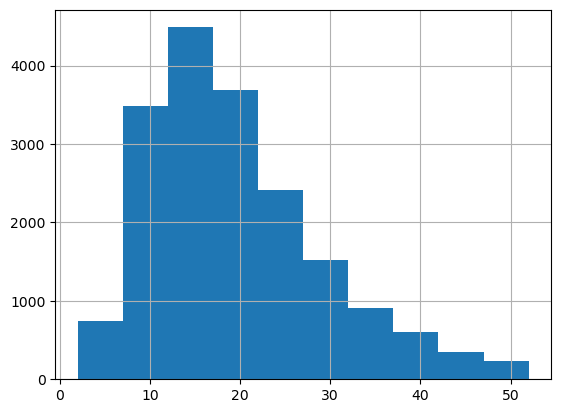

In [6]:
print(df['Title'].value_counts())

print(df['Title'].nunique())

print(df['Title'].str.len().describe())

df['Title'].str.len().hist()

print(df['Title'].str.contains(r'\d').mean())

print(df['Title'].isna().sum(), (df['Title'] == '').sum())

### Review Text

Review Text
The sweater and skirt are so pretty! they're really soft and have such an easy, comfortable look together. really love this gorgeous outfit.\n\ni am borderline small/medium and kept the size small after trying both on.                                                                                                                                                                                                                                                                                                2
I purchased this and another eva franco dress during retailer's recent 20% off sale. i was looking for dresses that were work appropriate, but that would also transition well to happy hour or date night. they both seemed to be just what i was looking for. i ordered a 4 regular and a 6 regular, as i am usually in between sizes. the 4 was definitely too small. the 6 fit, technically, but was very ill fitting. not only is the dress itself short, but it is very short-waisted. i a

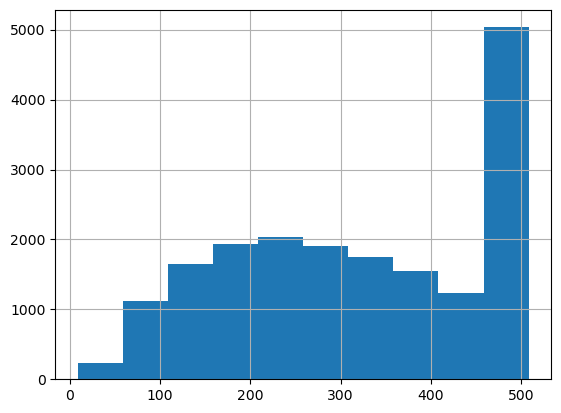

In [7]:
print(df['Review Text'].value_counts())

print(df['Review Text'].nunique())

print(df['Review Text'].str.len().describe())

df['Review Text'].str.len().hist()

print(df['Review Text'].str.contains(r'\d').mean())

print(df['Review Text'].isna().sum(), (df['Title'] == '').sum())

### Positive Feedback Count	

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  57  58  59  61  64  65  66  68  69  77  78  81  82  84  87  89
  93  94  95  98  99 108 122]
count    18442.000000
mean         2.697484
std          5.942220
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max        122.000000
Name: Positive Feedback Count, dtype: float64


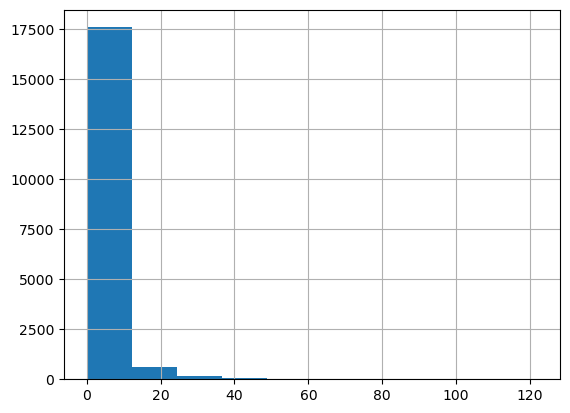

In [8]:
X['Positive Feedback Count'].hist()
PFC_unique = X['Positive Feedback Count'].unique()
PFC_unique.sort()
print(PFC_unique)
print(X['Positive Feedback Count'].describe())

### Division Name

<Axes: >

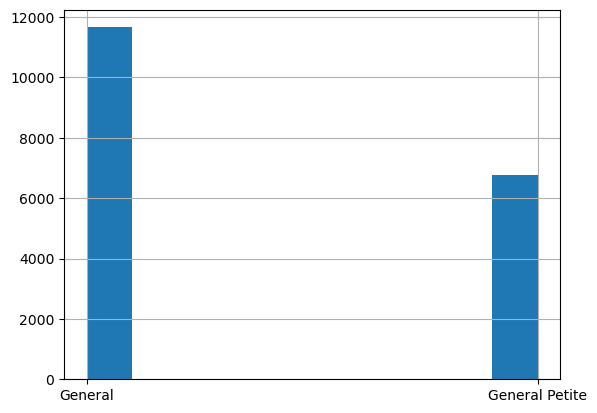

In [9]:
X['Division Name'].describe()
X['Division Name'].hist()

### Department Name

In [10]:
X['Department Name'].value_counts()

Department Name
Tops        8713
Dresses     5371
Bottoms     3184
Jackets      879
Intimate     188
Trend        107
Name: count, dtype: int64

### Class Name

In [11]:
X['Class Name'].value_counts()

Class Name
Dresses           5371
Knits             3981
Blouses           2587
Sweaters          1218
Pants             1157
Jeans              970
Fine gauge         927
Skirts             796
Jackets            598
Outerwear          281
Shorts             260
Lounge             188
Trend              107
Casual bottoms       1
Name: count, dtype: int64

## Building Pipeline

split data into numerical, categorical, and text features

In [12]:
num_features = (
    X[[
        'Age',
        'Positive Feedback Count'
    ]].columns
)
print('Numerical features:', num_features)

age_feature = (
    X[[
        'Age'
    ]].columns
)

pfc_feature = (
    X[[
        'Positive Feedback Count'
    ]].columns
)

cat_features = (
    X[[
        'Division Name',
        'Department Name',
        'Class Name',
    ]].columns
)
print('Categorical features:', cat_features)

text_features = (
    [
        'Title',
        'Review Text',
    ]
)
print ('Review Text features:', text_features)


Numerical features: Index(['Age', 'Positive Feedback Count'], dtype='object')
Categorical features: Index(['Division Name', 'Department Name', 'Class Name'], dtype='object')
Review Text features: ['Title', 'Review Text']


## Training Pipeline

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

num_age_pipeline = Pipeline([
    (
        'imputer',
        SimpleImputer(strategy='mean'),
    ),
    (
        'scaler',
        StandardScaler(),
    ),
])

num_age_pipeline

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())])

In [14]:
from sklearn.preprocessing import FunctionTransformer

def log_transform(x):
    return np.log(x + 1)

num_positive_feedback_count_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('transformer', FunctionTransformer(log_transform, validate=False)),
])

num_positive_feedback_count_pipeline

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('transformer',
                 FunctionTransformer(func=<function log_transform at 0x14b7001f0>))])

In [15]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
#    (
#        'ordinal_encoder',
#        OrdinalEncoder(
#            handle_unknown='use_encoded_value',
#            unknown_value=-1,
#        )
#    ),    
    (
        'imputer',
        SimpleImputer(
            strategy='most_frequent',
        )
    ),
    (
        'cat_encoder',
        OneHotEncoder(
            sparse_output=False,
            handle_unknown='ignore',
        )
    ),
])

cat_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('cat_encoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [16]:
from sklearn.base import BaseEstimator, TransformerMixin

class CountCharacter(BaseEstimator, TransformerMixin):
    def __init__(self, character: str):
        self.character = character

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return [[text.count(self.character)] for text in X]

In [17]:
class MeasureTextLength(BaseEstimator, TransformerMixin):
    def __init__(self):
        return None

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return [[len(text)] for text in X]

In [18]:
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import FunctionTransformer
import numpy as np

initial_text_preprocess = Pipeline([
    (
        'dimension_reshaper',
        FunctionTransformer(
            lambda x: x.squeeze(), validate=False
        ),
    ),
])

feature_engineering = FeatureUnion([
    ('count_spaces', CountCharacter(character=',')),
    ('count_exclamations', CountCharacter(character='!')),
    ('count_question_marks', CountCharacter(character='?')),
    ('measure_text_length', MeasureTextLength()),
])

character_counts_pipeline = Pipeline([
    (
        'initial_text_preprocess',
        initial_text_preprocess,
    ),
    (
        'feature_engineering',
        feature_engineering,
    ),
])
character_counts_pipeline

Pipeline(steps=[('initial_text_preprocess',
                 Pipeline(steps=[('dimension_reshaper',
                                  FunctionTransformer(func=<function <lambda> at 0x14b7012d0>))])),
                ('feature_engineering',
                 FeatureUnion(transformer_list=[('count_spaces',
                                                 CountCharacter(character=',')),
                                                ('count_exclamations',
                                                 CountCharacter(character='!')),
                                                ('count_question_marks',
                                                 CountCharacter(character='?')),
                                                ('measure_text_length',
                                                 MeasureTextLength())]))])

In [19]:
#! python -m spacy download en_core_web_sm

In [20]:
import spacy

nlp = spacy.load('en_core_web_sm')

In [21]:
class SpacyLemmatizer(BaseEstimator, TransformerMixin):
    def __init__(self, model_name="en_core_web_sm"):
        self.model_name = model_name  # just store the name, not the object

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        nlp = spacy.load(self.model_name)
        texts = X.astype(str).copy().tolist()
        lemmatized = [
            ' '.join(
                token.lemma_ for token in doc
                if not token.is_stop
            )
            for doc in nlp.pipe(texts)
        ]
        return lemmatized

In [22]:
class SpacyPosNerFeaturesMultiCharRelative(BaseEstimator, TransformerMixin):
    def __init__(self, text_columns):
        self.text_columns = text_columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        all_features = []
        nlp = spacy.load("en_core_web_sm")
        for col in self.text_columns:
            col_features = []
            for text in X[col].astype(str):
                doc = nlp(text)
                num_tokens = len([t for t in doc if not t.is_punct and not t.is_space])
                num_tokens = max(num_tokens, 1)

                char_len = len(text.strip())
                char_len = max(char_len, 1)

                pos_counts = doc.count_by(spacy.attrs.POS)
                entity_types = [ent.label_ for ent in doc.ents]
                num_ents = len(entity_types)

                feature_row = {
                    # relative to token count
                    f"{col}_rel_adjectives_per_token": pos_counts.get(nlp.vocab.strings["ADJ"], 0) / num_tokens,
                    f"{col}_rel_nouns_per_token": pos_counts.get(nlp.vocab.strings["NOUN"], 0) / num_tokens,
                    f"{col}_rel_entities_per_token": num_ents / num_tokens,

                    # relative to character count
                    f"{col}_rel_adjectives_per_char": pos_counts.get(nlp.vocab.strings["ADJ"], 0) / char_len,
                    f"{col}_rel_nouns_per_char": pos_counts.get(nlp.vocab.strings["NOUN"], 0) / char_len,
                    f"{col}_rel_entities_per_char": num_ents / char_len,

                    # binary NER flags
                    f"{col}_has_person": int("PERSON" in entity_types),
                    f"{col}_has_org": int("ORG" in entity_types),
                }
                col_features.append(feature_row)

            all_features.append(pd.DataFrame(col_features).reset_index(drop=True))

        return pd.concat(all_features, axis=1)

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_pipeline = Pipeline([
    (
        'dimension_reshaper',
        FunctionTransformer(
            lambda x: x.squeeze(), validate=False
        ),
    ),
    (
        'lemmatizer',
        SpacyLemmatizer(),
    ),
    (
        'tfidf_vectorizer',
        TfidfVectorizer(
            stop_words='english',
        ),
    ),
])
tfidf_pipeline 

Pipeline(steps=[('dimension_reshaper',
                 FunctionTransformer(func=<function <lambda> at 0x14a532c20>)),
                ('lemmatizer', SpacyLemmatizer()),
                ('tfidf_vectorizer', TfidfVectorizer(stop_words='english'))])

In [24]:
from scipy.sparse import hstack
from sklearn.pipeline import clone

class TfidfMultiColumnTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, text_columns, base_pipeline):
        self.text_columns = text_columns
        self.base_pipeline = base_pipeline
        self.pipelines = {}

    def fit(self, X, y=None):
        for col in self.text_columns:
            pipe = clone(self.base_pipeline)
            pipe.fit(X[col], y)
            self.pipelines[col] = pipe
        return self

    def transform(self, X):
        transformed = [
            self.pipelines[col].transform(X[col]) for col in self.text_columns
        ]
        return hstack(transformed)

In [25]:
class CharacterCountsMultiColumnTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, text_columns, base_pipeline):
        self.text_columns = text_columns
        self.base_pipeline = base_pipeline
        self.pipelines = {}

    def fit(self, X, y=None):
        for col in self.text_columns:
            pipe = clone(self.base_pipeline)
            pipe.fit(X[col], y)
            self.pipelines[col] = pipe
        return self

    def transform(self, X):
        all_features = []
        for col in self.text_columns:
            col_df = self.pipelines[col].transform(X[col])
            # Rename columns to indicate source
            if isinstance(col_df, pd.DataFrame):
                col_df.columns = [f"{col}__{c}" for c in col_df.columns]
            all_features.append(pd.DataFrame(col_df).reset_index(drop=True))
        return pd.concat(all_features, axis=1)

In [26]:
from sklearn.compose import ColumnTransformer

# POS/NER pipeline for multiple columns
pos_ner_pipeline = Pipeline([
    ('spacy_pos_ner', SpacyPosNerFeaturesMultiCharRelative(text_columns=['Review Text', 'Title']))
])



# Now add it to the feature_engineering step
feature_engineering = ColumnTransformer([
    ('num_age', num_age_pipeline, ['Age']),
    ('num_positive_feedback_count', num_positive_feedback_count_pipeline, ['Positive Feedback Count']),
    ('cat', cat_pipeline, cat_features),
    ('character_counts_title', character_counts_pipeline, ['Title']),
    ('character_counts_review', character_counts_pipeline, ['Review Text']),
    ('tfidf_text_title', tfidf_pipeline, ['Title']),
    ('tfidf_text_review', tfidf_pipeline, ['Review Text']),
])

full_feature_union = FeatureUnion([
    ('column_features', feature_engineering),  # your existing ColumnTransformer
    ('pos_ner_features', SpacyPosNerFeaturesMultiCharRelative(['Review Text', 'Title']))
])

full_feature_union

FeatureUnion(transformer_list=[('column_features',
                                ColumnTransformer(transformers=[('num_age',
                                                                 Pipeline(steps=[('imputer',
                                                                                  SimpleImputer()),
                                                                                 ('scaler',
                                                                                  StandardScaler())]),
                                                                 ['Age']),
                                                                ('num_positive_feedback_count',
                                                                 Pipeline(steps=[('imputer',
                                                                                  SimpleImputer()),
                                                                                 ('scaler',
                                                                                  StandardScaler()),
                                                                                 ('transformer',
                                                                                  FunctionTransformer(func=<function log_transform at 0x14b70...
                                                                                  TfidfVectorizer(stop_words='english'))]),
                                                                 ['Title']),
                                                                ('tfidf_text_review',
                                                                 Pipeline(steps=[('dimension_reshaper',
                                                                                  FunctionTransformer(func=<function <lambda> at 0x14a532c20>)),
                                                                                 ('lemmatizer',
                                                                                  SpacyLemmatizer()),
                                                                                 ('tfidf_vectorizer',
                                                                                  TfidfVectorizer(stop_words='english'))]),
                                                                 ['Review '
                                                                  'Text'])])),
                               ('pos_ner_features',
                                SpacyPosNerFeaturesMultiCharRelative(text_columns=['Review '
                                                                                   'Text',
                                                                                   'Title']))])

## Testing different classifiers

In [27]:
from sklearn.ensemble import RandomForestClassifier


rf_model_pipeline = Pipeline([
    ('features', full_feature_union),
    ('classifier', RandomForestClassifier(random_state=27)),
])

rf_model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('column_features',
                                                 ColumnTransformer(transformers=[('num_age',
                                                                                  Pipeline(steps=[('imputer',
                                                                                                   SimpleImputer()),
                                                                                                  ('scaler',
                                                                                                   StandardScaler())]),
                                                                                  ['Age']),
                                                                                 ('num_positive_feedback_count',
                                                                                  Pipeline(steps=[('imputer',
                                                                                                   SimpleImputer()),
                                                                                                  ('scaler',
                                                                                                   StandardScaler()),
                                                                                                  ('transformer',
                                                                                                   FunctionTransformer(func=<fu...
                                                                                  Pipeline(steps=[('dimension_reshaper',
                                                                                                   FunctionTransformer(func=<function <lambda> at 0x14a532c20>)),
                                                                                                  ('lemmatizer',
                                                                                                   SpacyLemmatizer()),
                                                                                                  ('tfidf_vectorizer',
                                                                                                   TfidfVectorizer(stop_words='english'))]),
                                                                                  ['Review '
                                                                                   'Text'])])),
                                                ('pos_ner_features',
                                                 SpacyPosNerFeaturesMultiCharRelative(text_columns=['Review '
                                                                                                    'Text',
                                                                                                    'Title']))])),
                ('classifier', RandomForestClassifier(random_state=27))])

In [28]:
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score

y_pred_forest_pipeline = rf_model_pipeline.predict(X_test)
accuracy_forest_pipeline = accuracy_score(y_test, y_pred_forest_pipeline)
#scores = cross_val_score(rf_model_pipeline, X_train, y_train, cv=5, scoring='f1')

print('Accuracy:', accuracy_forest_pipeline)
#print(f"Mean F1 Score = {scores.mean():.4f}")


Accuracy: 0.8428184281842819


In [29]:
from sklearn.ensemble import GradientBoostingClassifier


gb_model_pipeline = Pipeline([
    ('features', full_feature_union),
    ('classifier', GradientBoostingClassifier(random_state=27)),
])

gb_model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('column_features',
                                                 ColumnTransformer(transformers=[('num_age',
                                                                                  Pipeline(steps=[('imputer',
                                                                                                   SimpleImputer()),
                                                                                                  ('scaler',
                                                                                                   StandardScaler())]),
                                                                                  ['Age']),
                                                                                 ('num_positive_feedback_count',
                                                                                  Pipeline(steps=[('imputer',
                                                                                                   SimpleImputer()),
                                                                                                  ('scaler',
                                                                                                   StandardScaler()),
                                                                                                  ('transformer',
                                                                                                   FunctionTransformer(func=<fu...
                                                                                  Pipeline(steps=[('dimension_reshaper',
                                                                                                   FunctionTransformer(func=<function <lambda> at 0x14a532c20>)),
                                                                                                  ('lemmatizer',
                                                                                                   SpacyLemmatizer()),
                                                                                                  ('tfidf_vectorizer',
                                                                                                   TfidfVectorizer(stop_words='english'))]),
                                                                                  ['Review '
                                                                                   'Text'])])),
                                                ('pos_ner_features',
                                                 SpacyPosNerFeaturesMultiCharRelative(text_columns=['Review '
                                                                                                    'Text',
                                                                                                    'Title']))])),
                ('classifier', GradientBoostingClassifier(random_state=27))])

In [30]:
from sklearn.metrics import accuracy_score

y_pred_gb_pipeline = gb_model_pipeline.predict(X_test)
accuracy_gb_pipeline = accuracy_score(y_test, y_pred_gb_pipeline)
#scores = cross_val_score(gb_model_pipeline, X_train, y_train, cv=5, scoring='f1')

print('Accuracy:', accuracy_gb_pipeline)
#print(f"Mean F1 Score = {scores.mean():.4f}")

Accuracy: 0.8682926829268293


In [31]:
from sklearn.neural_network import MLPClassifier


mlp_model_pipeline = Pipeline([
    ('features', full_feature_union),
    ('classifier', MLPClassifier(random_state=27)),
])

mlp_model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('column_features',
                                                 ColumnTransformer(transformers=[('num_age',
                                                                                  Pipeline(steps=[('imputer',
                                                                                                   SimpleImputer()),
                                                                                                  ('scaler',
                                                                                                   StandardScaler())]),
                                                                                  ['Age']),
                                                                                 ('num_positive_feedback_count',
                                                                                  Pipeline(steps=[('imputer',
                                                                                                   SimpleImputer()),
                                                                                                  ('scaler',
                                                                                                   StandardScaler()),
                                                                                                  ('transformer',
                                                                                                   FunctionTransformer(func=<fu...
                                                                                  Pipeline(steps=[('dimension_reshaper',
                                                                                                   FunctionTransformer(func=<function <lambda> at 0x14a532c20>)),
                                                                                                  ('lemmatizer',
                                                                                                   SpacyLemmatizer()),
                                                                                                  ('tfidf_vectorizer',
                                                                                                   TfidfVectorizer(stop_words='english'))]),
                                                                                  ['Review '
                                                                                   'Text'])])),
                                                ('pos_ner_features',
                                                 SpacyPosNerFeaturesMultiCharRelative(text_columns=['Review '
                                                                                                    'Text',
                                                                                                    'Title']))])),
                ('classifier', MLPClassifier(random_state=27))])

In [32]:
from sklearn.metrics import accuracy_score

y_pred_mlp_pipeline = mlp_model_pipeline.predict(X_test)
accuracy_mlp_pipeline = accuracy_score(y_test, y_pred_mlp_pipeline)

print('Accuracy:', accuracy_mlp_pipeline)

Accuracy: 0.8715447154471545


In [33]:
from sklearn.linear_model import LogisticRegression


lr_model_pipeline = Pipeline([
    ('features', full_feature_union),
    ('classifier', LogisticRegression(random_state=27)),
])

lr_model_pipeline.fit(X_train, y_train)

/Users/lucianwillareth/mambaforge/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('column_features',
                                                 ColumnTransformer(transformers=[('num_age',
                                                                                  Pipeline(steps=[('imputer',
                                                                                                   SimpleImputer()),
                                                                                                  ('scaler',
                                                                                                   StandardScaler())]),
                                                                                  ['Age']),
                                                                                 ('num_positive_feedback_count',
                                                                                  Pipeline(steps=[('imputer',
                                                                                                   SimpleImputer()),
                                                                                                  ('scaler',
                                                                                                   StandardScaler()),
                                                                                                  ('transformer',
                                                                                                   FunctionTransformer(func=<fu...
                                                                                  Pipeline(steps=[('dimension_reshaper',
                                                                                                   FunctionTransformer(func=<function <lambda> at 0x14a532c20>)),
                                                                                                  ('lemmatizer',
                                                                                                   SpacyLemmatizer()),
                                                                                                  ('tfidf_vectorizer',
                                                                                                   TfidfVectorizer(stop_words='english'))]),
                                                                                  ['Review '
                                                                                   'Text'])])),
                                                ('pos_ner_features',
                                                 SpacyPosNerFeaturesMultiCharRelative(text_columns=['Review '
                                                                                                    'Text',
                                                                                                    'Title']))])),
                ('classifier', LogisticRegression(random_state=27))])

In [34]:
from sklearn.metrics import accuracy_score

y_pred_lr_pipeline = lr_model_pipeline.predict(X_test)
accuracy_lr_pipeline = accuracy_score(y_test, y_pred_lr_pipeline)

print('Accuracy:', accuracy_lr_pipeline)

Accuracy: 0.8617886178861789


## Fine-Tuning Pipeline

### GradientBoostingClassifier

In [44]:
# GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'classifier__n_estimators': [200],
    'classifier__learning_rate': [0.1],
    'classifier__max_depth': [3, 5, 7],
    'classifier__min_samples_split': [2],
    'classifier__min_samples_leaf': [1],
    'classifier__subsample': [1.0],
    'classifier__max_features': [None]
}


param_search = RandomizedSearchCV(
    estimator=gb_model_pipeline,
    param_distributions=param_dist,
    n_iter=5,     # Try 6 different combinations of parameters
    cv=5,         # Use 5-fold cross-validation
    n_jobs=-1,    # Use all available processors (for multiprocessing)
    refit=True,   # Refit the model using the best parameters found
    verbose=3,    # Output of parameters, score, time
    random_state=27,
)
#print(param_search.get_params().keys())

param_search.fit(X_train, y_train)

# Retrieve the best parameters
param_search.best_params_

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/Users/lucianwillareth/mambaforge/lib/python3.10/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 3 is smaller than n_iter=5. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV 2/5] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__max_features=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=200, classifier__subsample=1.0;, score=0.884 total time=22.1min
[CV 1/5] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__max_features=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=200, classifier__subsample=1.0;, score=0.876 total time=21.8min
[CV 4/5] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__max_features=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=200, classifier__subsample=1.0;, score=0.877 total time= 6.8min
[CV 3/5] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__max_features=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=200, classifier__subsample=1.0;, score=0.875 tot

{'classifier__subsample': 1.0,
 'classifier__n_estimators': 200,
 'classifier__min_samples_split': 2,
 'classifier__min_samples_leaf': 1,
 'classifier__max_features': None,
 'classifier__max_depth': 7,
 'classifier__learning_rate': 0.1}

In [46]:
model_best = param_search.best_estimator_
model_best
y_pred_optimized_pipeline = model_best.predict(X_test)
accuracy_optimized_pipeline = accuracy_score(y_test, y_pred_optimized_pipeline)

print('Accuracy:', accuracy_optimized_pipeline)

Accuracy: 0.8845528455284553


### RandomForestClassifier

In [ ]:
# RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV


param_dist = {
    'classifier__n_estimators': [200],
    'classifier__max_depth': [None],
    'features__column_features__tfidf_text_title__tfidf_vectorizer__max_df': [0.75, 1.0],
    'classifier__min_samples_split': [2],#, 5],
    'classifier__min_samples_leaf': [1],#, 2, 4],
    'classifier__max_features': [None],#, None, 'sqrt'],
    'classifier__bootstrap': [True],#, False]
}



param_search = RandomizedSearchCV(
    estimator=model_pipeline,
    param_distributions=param_dist,
    n_iter=6,     # Try 6 different combinations of parameters
    cv=5,         # Use 5-fold cross-validation
    n_jobs=-1,    # Use all available processors (for multiprocessing)
    refit=True,   # Refit the model using the best parameters found
    verbose=3,    # Output of parameters, score, time
    random_state=27,
)
#print(param_search.get_params().keys())

param_search.fit(X_train, y_train)

# Retrieve the best parameters
param_search.best_params_

In [45]:
model_best = param_search.best_estimator_
model_best

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('column_features',
                                                 ColumnTransformer(transformers=[('num_age',
                                                                                  Pipeline(steps=[('imputer',
                                                                                                   SimpleImputer()),
                                                                                                  ('scaler',
                                                                                                   StandardScaler())]),
                                                                                  ['Age']),
                                                                                 ('num_positive_feedback_count',
                                                                                  Pipeline(steps=[('imputer',
                                                                                                   SimpleImputer()),
                                                                                                  ('scaler',
                                                                                                   StandardScaler()),
                                                                                                  ('transformer',
                                                                                                   FunctionTransformer(func=<fu...
                                                                                                   FunctionTransformer(func=<function <lambda> at 0x14a532c20>)),
                                                                                                  ('lemmatizer',
                                                                                                   SpacyLemmatizer()),
                                                                                                  ('tfidf_vectorizer',
                                                                                                   TfidfVectorizer(stop_words='english'))]),
                                                                                  ['Review '
                                                                                   'Text'])])),
                                                ('pos_ner_features',
                                                 SpacyPosNerFeaturesMultiCharRelative(text_columns=['Review '
                                                                                                    'Text',
                                                                                                    'Title']))])),
                ('classifier',
                 GradientBoostingClassifier(max_depth=7, n_estimators=200,
                                            random_state=27))])

[CV 2/5] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__max_features=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=200, classifier__subsample=1.0;, score=0.879 total time=21.6min
[CV 3/5] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__max_features=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=200, classifier__subsample=1.0;, score=0.873 total time= 6.8min


{'randomforestclassifier__n_estimators': 200,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__max_features': None,
 'randomforestclassifier__max_depth': None,
 'randomforestclassifier__bootstrap': True,
 'columntransformer__tfidf_text_review__tfidf_vectorizer__max_df': 1.0}

 Accuracy: 0.8802168021680217

### MLPClassifier

In [51]:
# MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

param_dist = {
    'classifier__hidden_layer_sizes': [(90,60), (70, 70), (120, 70)],
    'classifier__activation': ['relu'],
    'classifier__alpha': [0.004575139961979373],
    'classifier__learning_rate_init': [0.0003633017839459249],
    'classifier__max_iter':[500], 
    'classifier__early_stopping':[True],
    'classifier__random_state': [42]
}

param_search = RandomizedSearchCV(
    estimator=mlp_model_pipeline,
    param_distributions=param_dist,
    n_iter=6,     # Try 6 different combinations of parameters
    scoring='f1',
    cv=5,         # Use 5-fold cross-validation
    n_jobs=-1,    # Use all available processors (for multiprocessing)
    refit=True,   # Refit the model using the best parameters found
    verbose=3,    # Output of parameters, score, time
    random_state=27,
)
#print(param_search.get_params().keys())

param_search.fit(X_train, y_train)

# Retrieve the best parameters
param_search.best_params_

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/Users/lucianwillareth/mambaforge/lib/python3.10/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 3 is smaller than n_iter=6. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV 5/5] END classifier__activation=relu, classifier__alpha=0.004575139961979373, classifier__early_stopping=True, classifier__hidden_layer_sizes=(90, 60), classifier__learning_rate_init=0.0003633017839459249, classifier__max_iter=500, classifier__random_state=42;, score=0.945 total time= 7.6min
[CV 2/5] END classifier__activation=relu, classifier__alpha=0.004575139961979373, classifier__early_stopping=True, classifier__hidden_layer_sizes=(90, 60), classifier__learning_rate_init=0.0003633017839459249, classifier__max_iter=500, classifier__random_state=42;, score=0.947 total time= 7.4min
[CV 5/5] END classifier__activation=relu, classifier__alpha=0.004575139961979373, classifier__early_stopping=True, classifier__hidden_layer_sizes=(120, 70), classifier__learning_rate_init=0.0003633017839459249, classifier__max_iter=500, classifier__random_state=42;, score=0.942 total time= 6.9min


{'classifier__random_state': 42,
 'classifier__max_iter': 500,
 'classifier__learning_rate_init': 0.0003633017839459249,
 'classifier__hidden_layer_sizes': (90, 60),
 'classifier__early_stopping': True,
 'classifier__alpha': 0.004575139961979373,
 'classifier__activation': 'relu'}

In [52]:
model_best = param_search.best_estimator_
model_best
y_pred_optimized_pipeline = model_best.predict(X_test)
accuracy_optimized_pipeline = accuracy_score(y_test, y_pred_optimized_pipeline)

print('Accuracy:', accuracy_optimized_pipeline)

Accuracy: 0.9018970189701897
[CV 3/5] END classifier__activation=relu, classifier__alpha=0.004575139961979373, classifier__early_stopping=True, classifier__hidden_layer_sizes=(70, 70), classifier__learning_rate_init=0.0003633017839459249, classifier__max_iter=500, classifier__random_state=42;, score=0.944 total time= 7.0min
[CV 4/5] END classifier__activation=relu, classifier__alpha=0.004575139961979373, classifier__early_stopping=True, classifier__hidden_layer_sizes=(70, 70), classifier__learning_rate_init=0.0003633017839459249, classifier__max_iter=500, classifier__random_state=42;, score=0.939 total time= 6.8min
[CV 2/5] END classifier__activation=relu, classifier__alpha=0.004575139961979373, classifier__early_stopping=True, classifier__hidden_layer_sizes=(70, 70), classifier__learning_rate_init=0.0003633017839459249, classifier__max_iter=500, classifier__random_state=42;, score=0.944 total time= 7.1min
[CV 1/5] END classifier__activation=relu, classifier__alpha=0.004575139961979373